# 1. Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_csv('train.csv')['frame']
df_train.head()

NameError: name 'pd' is not defined

# 2. Обучение модели (без пропусков и категориальных переменных)

## 2.1 Удаление пропусков и категориальных переменных.

In [ ]:
df_train = df_train.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [ ]:
df_train = df_train.drop(df_train[(df_train['Age'].isna())].index)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     714 non-null    int64  
 4   Parch     714 non-null    int64  
 5   Fare      714 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 39.0 KB


## 2.2. Обучение модели

In [ ]:
X = df_train.drop(['Survived'], axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [ ]:
y = df_train['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

## 2.3. Оценка качества

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.7057793345008757, 0.6993006993006993)

В целом модель хорошо предсказывает значение Survived.

Значение accuracy для тренировочных и для тестовых данных = 0.7.

# 3. Загрузка данных

In [ ]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 4. Удаление лишних признаков

In [ ]:
len(df_train['PassengerId'].unique()), len(df_train['Name'].unique()), len(df_train['Ticket'].unique())

(891, 891, 681)

Такие признаки как **PassengerId**, **Name** и **Ticket** имеют уникальные значения для каждой записи, они бессмысленны для модели.

In [ ]:
len(df_train.loc[~df_train['Cabin'].isna()])

204

Признак **Cabin** имеет много промущенных значений, которые невозможнно восстановить из имеющихся в датасете данных.

**'Name' пригодится для заполнения пропусков в колонке 'Age', его можно удалить чуть позже. Все остальны можно удалить сразу.**

In [ ]:
#df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_train = df_train.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


# 5. Работа с пропусками

## 5.1. Анализ пропусков

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
len(df_train.loc[(df_train['Age'].isna()) | (df_train['Embarked'].isna())]) / len(df_train)

0.20089786756453423

20 % данных будет потеряно при удалении строк, содержащих пропуски.

## 5.2. Заполнение пропусков

### 5.2.1. Age

Для заполнения возраста можно использовать другие атрибуты.

Здесь пригодится имя пассажира, а точнее сокращенное обращение (Mr, Miss и т.д.), которое может указывать на возраст. Для удобства лучше создать новый атрибут Title.

In [ ]:
df_train['Title'] = df_train['Name'].str.extract(r', ([\w\s]+\w+\.)')
df_train['Title'].value_counts()

Mr.              517
Miss.            182
Mrs.             125
Master.           40
Dr.                7
Rev.               6
Mlle.              2
Major.             2
Col.               2
the Countess.      1
Capt.              1
Ms.                1
Sir.               1
Lady.              1
Mme.               1
Don.               1
Jonkheer.          1
Name: Title, dtype: int64

In [ ]:
df_train.loc[(df_train['Age'].isna())]['Title'].value_counts()

Mr.        119
Miss.       36
Mrs.        17
Master.      4
Dr.          1
Name: Title, dtype: int64

Всего в датасете 17 вариантов сокращенных обращений, 5 из которых используются в строках с незаполненным возрастом.

- Mr. (мужчина любого возраста)

- Miss. (обычно незамужняя женщина)

- Mrs. (обычно замужняя женщина)

- Master. (обычно мальчики или юноши)

- Dr. (Доктор)

Пропуски для Master. и Dr. можно заполнить средним значением возраста пассажиров, в именах которых указано соответствующее сокращение.

In [ ]:
# Dr.

df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Dr.')].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,6.000000,6.000000,6.000000,6.000000,6.0,6.000000
mean,0.500000,1.333333,42.000000,0.666667,0.0,50.763200
std,0.547723,0.516398,12.016655,1.032796,0.0,49.819135
min,0.000000,1.000000,23.000000,0.000000,0.0,10.500000
25%,0.000000,1.000000,35.000000,0.000000,0.0,16.982300
50%,0.500000,1.000000,46.500000,0.000000,0.0,28.214600
75%,1.000000,1.750000,49.750000,1.500000,0.0,75.125000
max,1.000000,2.000000,54.000000,2.000000,0.0,133.650000


In [ ]:
age_mean = df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Dr.')].describe()['Age'][1]
df_train.loc[(df_train['Age'].isna()) & (df_train['Title'] == 'Dr.'), 'Age'] = round(age_mean)

In [ ]:
# Master.

df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Master.')].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.583333,2.583333,4.574167,2.194444,1.388889,35.072686
std,0.500000,0.649175,3.619872,1.737312,0.549170,28.599412
min,0.000000,1.000000,0.420000,0.000000,0.000000,8.516700
25%,0.000000,2.000000,1.000000,1.000000,1.000000,20.081250
50%,1.000000,3.000000,3.500000,1.000000,1.000000,29.125000
75%,1.000000,3.000000,8.000000,4.000000,2.000000,39.171875
max,1.000000,3.000000,12.000000,5.000000,2.000000,151.550000


In [ ]:
age_mean = df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Master.')].describe()['Age'][1]
df_train.loc[(df_train['Age'].isna()) & (df_train['Title'] == 'Master.'), 'Age'] = round(age_mean)

В случае Mr., Miss. и Mrs. нет конкретных ограничений по возрасту.
Для каждого из указанных обращений можно построить корреляционную матрицу, чтобы оценить зависимость возраста от других атрибутов.

In [ ]:
df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Mr.')]['Age'].describe()

count    398.000000
mean      32.368090
std       12.708793
min       11.000000
25%       23.000000
50%       30.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Miss.')]['Age'].describe()

count    146.000000
mean      21.773973
std       12.990292
min        0.750000
25%       14.125000
50%       21.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64

In [ ]:
df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Mrs.')]['Age'].describe()

count    108.000000
mean      35.898148
std       11.433628
min       14.000000
25%       27.750000
50%       35.000000
75%       44.000000
max       63.000000
Name: Age, dtype: float64

In [ ]:
# Mr.

df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Mr.')].corr()['Age']

<ipython-input-527-bdfa17eb6d76>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Mr.')].corr()['Age']


Survived    0.023986
Pclass     -0.396574
Age         1.000000
SibSp      -0.115114
Parch       0.051149
Fare        0.113297
Name: Age, dtype: float64

Для Mr. заметна небольшая отрицательная связь Age с Pclass (чем выше класс обслуживания, тем старше пассажир). В итоге 119 пропущенных значений заполнятся не одним средним, а тремя.

In [ ]:
age_mean = df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Mr.') & (df_train['Pclass'] == 1)]['Age'].describe()[1]
age_mean

41.58045977011494

In [ ]:
df_train.loc[(df_train['Age'].isna()) & (df_train['Title'] == 'Mr.') & (df_train['Pclass'] == 1), 'Age'] = round(age_mean)

In [ ]:
age_mean = df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Mr.') & (df_train['Pclass'] == 2)]['Age'].describe()[1]
age_mean

32.76829268292683

In [ ]:
df_train.loc[(df_train['Age'].isna()) & (df_train['Title'] == 'Mr.') & (df_train['Pclass'] == 2), 'Age'] = round(age_mean)

In [ ]:
age_mean = df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Mr.') & (df_train['Pclass'] == 3)]['Age'].describe()[1]
age_mean

28.724890829694324

In [ ]:
df_train.loc[(df_train['Age'].isna()) & (df_train['Title'] == 'Mr.') & (df_train['Pclass'] == 3), 'Age'] = round(age_mean)

In [ ]:
# Miss.

df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Miss.')].corr()['Age']

<ipython-input-534-b6cb6dfb3e69>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Miss.')].corr()['Age']


Survived    0.140961
Pclass     -0.463179
Age         1.000000
SibSp      -0.370607
Parch      -0.521645
Fare        0.241056
Name: Age, dtype: float64

Для Miss. заметна отрицательная связь Age с Pclass, SibSp, Parch (чем выше класс обслуживания и больше количество родственников, тем старше пассажир).

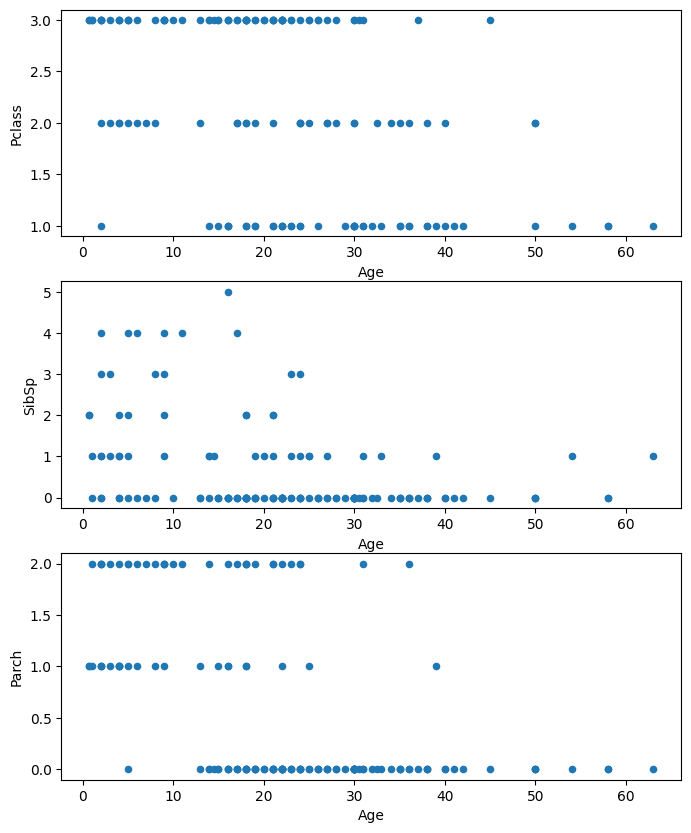

In [ ]:
columns = ['Pclass', 'SibSp', 'Parch']
fig, ax = plt.subplots(len(columns), 1, figsize=(8, 10))

for i in range(len(columns)):
  df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Miss.')].plot.scatter('Age', columns[i], ax=ax[i])

По графикам выше видно, что распределение возраста заметно меняется при изменении Pclass и Parch (при Parch = 0 и Parch > 0). А вот SibSp показывает слабую связь с возрастом (скорее изменяется количество точек, а не их место концентрации).

In [ ]:
pclass = [1, 2, 3]

for i in range(len(pclass) + 1):
  age_mean = df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Miss.') &
                          (df_train['Pclass'] == i) & (df_train['Parch'] == 0)]['Age'].describe()[1]
  if age_mean == age_mean:
    print(f'Pclass = {i}, Parch = {0}')
    print(f'age_mean = {round(age_mean)}\n')

    df_train.loc[(df_train['Age'].isna()) & (df_train['Title'] == 'Miss.') &
                 (df_train['Pclass'] == i) & (df_train['Parch'] == 0), 'Age'] = round(age_mean)

  age_mean = df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Miss.') &
                          (df_train['Pclass'] == i) & (df_train['Parch'] > 0)]['Age'].describe()[1]
  if age_mean == age_mean:
    print(f'Pclass = {i}, Parch > {0}')
    print(f'age_mean = {round(age_mean)}\n')

    df_train.loc[(df_train['Age'].isna()) & (df_train['Title'] == 'Miss.') &
                 (df_train['Pclass'] == i) & (df_train['Parch'] > 0), 'Age'] = round(age_mean)

Pclass = 1, Parch = 0
age_mean = 35

Pclass = 1, Parch > 0
age_mean = 21

Pclass = 2, Parch = 0
age_mean = 30

Pclass = 2, Parch > 0
age_mean = 11

Pclass = 3, Parch = 0
age_mean = 22

Pclass = 3, Parch > 0
age_mean = 7



In [ ]:
# Mrs.

df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Mrs.')]['Age'].describe()

count    108.000000
mean      35.898148
std       11.433628
min       14.000000
25%       27.750000
50%       35.000000
75%       44.000000
max       63.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Pclass'>

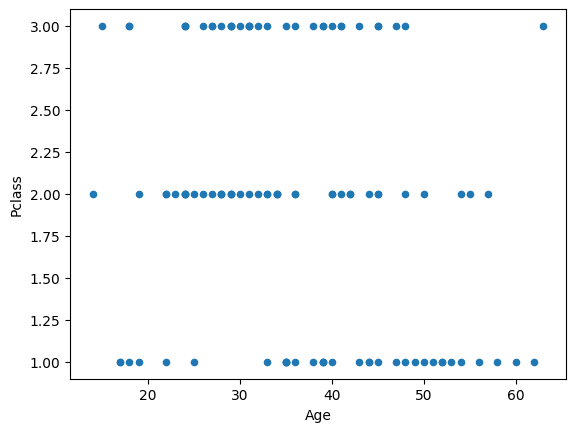

In [ ]:
df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Mrs.')].plot.scatter('Age', 'Pclass')

На графике видно взаимосвязь между возрастом и классом обслуживания. Данные можно разбить на Pclass = 1 и Pclass > 1.

In [ ]:
df_train.loc[(df_train['Age'].isna())]['Title'].value_counts()

Mrs.    17
Name: Title, dtype: int64

In [ ]:
age_mean = df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Mrs.') &
             (df_train['Pclass'] == 1 )]['Age'].describe()[1]

df_train.loc[(df_train['Age'].isna()) & (df_train['Title'] == 'Mrs.') &
             (df_train['Pclass'] == 1 ), 'Age'] = round(age_mean)

print(round(age_mean))

41


In [ ]:
age_mean = df_train.loc[~(df_train['Age'].isna()) & (df_train['Title'] == 'Mrs.') &
             (df_train['Pclass'] > 1 )]['Age'].describe()[1]

df_train.loc[(df_train['Age'].isna()) & (df_train['Title'] == 'Mrs.') &
             (df_train['Pclass'] > 1 ), 'Age'] = round(age_mean)

print(round(age_mean))

34


### 5.2.2. Embarked

In [ ]:
df_train.loc[df_train['Embarked'].isna()].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN,Miss.
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN,Mrs.


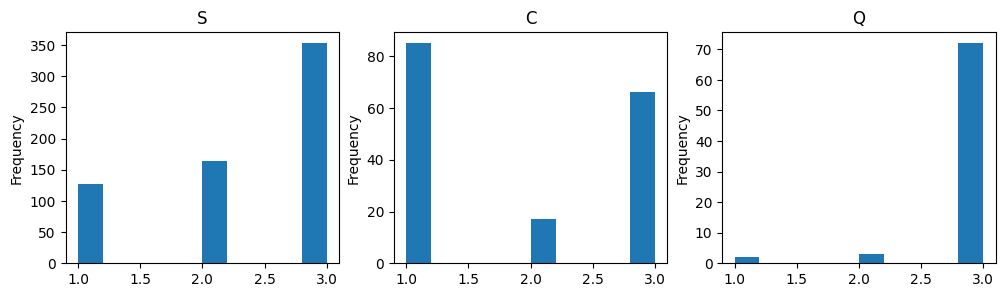

In [ ]:
embarked = ['S', 'C', 'Q']
fig, ax = plt.subplots(1, len(embarked), figsize=(12, 3))

for i in range(len(embarked)):
  df_train.loc[(df_train['Embarked'] == embarked[i])]['Pclass'].plot.hist(ax=ax[i]).set_title(embarked[i])

Пропуски в Embarked у пассажиров с 1 классом обслуживания. В качестве данных для заполнения можно использовать тот пункт отправления, из которого в основном отправлялись пассажиры с 1 классом, - это "C".

In [ ]:
df_train.loc[(df_train['Embarked'].isna()), 'Embarked'] = 'C'

### 5.2.3. Fare

In [ ]:
df_train.loc[(df_train['Fare'] == 0.0)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,0.0,S,Mr.
263,0,1,"Harrison, Mr. William",male,40.0,0,0,0.0,S,Mr.
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,0.0,S,Mr.
277,0,2,"Parkes, Mr. Francis ""Frank""",male,33.0,0,0,0.0,S,Mr.
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,0.0,S,Mr.
413,0,2,"Cunningham, Mr. Alfred Fleming",male,33.0,0,0,0.0,S,Mr.
466,0,2,"Campbell, Mr. William",male,33.0,0,0,0.0,S,Mr.
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,33.0,0,0,0.0,S,Mr.
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,0.0,S,Mr.
633,0,1,"Parr, Mr. William Henry Marsh",male,42.0,0,0,0.0,S,Mr.


В данном случае пропуски можно заполнить средним значением похожих записей (Embarked = 'S', Sex = 'male'), разделив их по классам обслуживания.

In [ ]:
fare_mean = df_train.loc[~(df_train['Fare'] == 0.0) & (df_train['Embarked'] == 'S') &
             (df_train['Sex'] == 'male') & (df_train['Pclass'] == 1)]['Fare'].describe()[1]

df_train.loc[(df_train['Fare'] == 0.0) & (df_train['Pclass'] == 1), 'Fare'] = round(fare_mean, 4)

In [ ]:
fare_mean = df_train.loc[~(df_train['Fare'] == 0.0) & (df_train['Embarked'] == 'S') &
             (df_train['Sex'] == 'male') & (df_train['Pclass'] == 2)]['Fare'].describe()[1]

df_train.loc[(df_train['Fare'] == 0.0) & (df_train['Pclass'] == 2), 'Fare'] = round(fare_mean, 4)

In [ ]:
fare_mean = df_train.loc[~(df_train['Fare'] == 0.0) & (df_train['Embarked'] == 'S') &
             (df_train['Sex'] == 'male') & (df_train['Pclass'] == 3)]['Fare'].describe()[1]

df_train.loc[(df_train['Fare'] == 0.0) & (df_train['Pclass'] == 3), 'Fare'] = round(fare_mean, 4)

In [ ]:
df_train = df_train.drop(['Name', 'Title'], axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# 6. Категориальные переменные

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
le = LabelEncoder()
le.fit(df_train['Sex'])

df_train = pd.get_dummies(df_train, columns=['Embarked'])
df_train['Sex'] = pd.Series(le.transform(df_train['Sex']))

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


# 7. Выбросы

<Axes: >

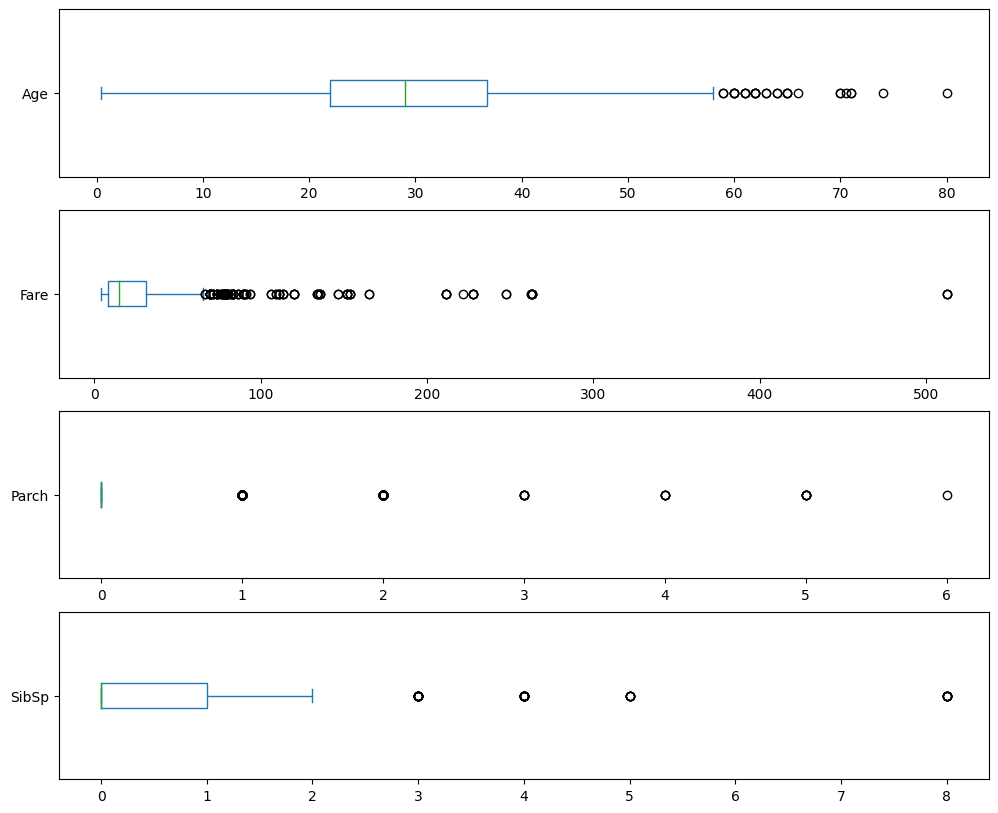

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(12, 10))
df_train['Age'].plot.box(vert=False, ax=ax[0])
df_train['Fare'].plot.box(vert=False, ax=ax[1])
df_train['Parch'].plot.box(vert=False, ax=ax[2])
df_train['SibSp'].plot.box(vert=False, ax=ax[3])

## 7.1. Age

In [ ]:
up_q = np.percentile(df_train['Age'], 75)
low_q = np.percentile(df_train['Age'], 25)
up_w = df_train['Age'].loc[(df_train['Age'] <= up_q + 1.5 * (up_q - low_q))].max()

len(df_train.loc[df_train['Age'] > up_w])

28

In [ ]:
(df_train.loc[df_train['Age'] <= up_w]).corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.356877,-0.538535,-0.045244,-0.041681,0.085944,0.255957,0.171746,0.007482,-0.155286
Pclass,-0.356877,1.000000,0.148296,-0.383971,0.081120,0.022581,-0.566151,-0.247886,0.214784,0.082122
Sex,-0.538535,0.148296,1.000000,0.089786,-0.109860,-0.254014,-0.178703,-0.086735,-0.077671,0.124938
Age,-0.045244,-0.383971,0.089786,1.000000,-0.314760,-0.229567,0.116520,0.060002,-0.075327,-0.005187
SibSp,-0.041681,0.081120,-0.109860,-0.314760,1.000000,0.414989,0.152227,-0.064618,-0.025716,0.072841
Parch,0.085944,0.022581,-0.254014,-0.229567,0.414989,1.000000,0.191093,-0.014998,-0.080931,0.064096
Fare,0.255957,-0.566151,-0.178703,0.116520,0.152227,0.191093,1.000000,0.270125,-0.118493,-0.162236
Embarked_C,0.171746,-0.247886,-0.086735,0.060002,-0.064618,-0.014998,0.270125,1.000000,-0.149434,-0.782666
Embarked_Q,0.007482,0.214784,-0.077671,-0.075327,-0.025716,-0.080931,-0.118493,-0.149434,1.000000,-0.498495
Embarked_S,-0.155286,0.082122,0.124938,-0.005187,0.072841,0.064096,-0.162236,-0.782666,-0.498495,1.000000


In [ ]:
df_train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.543351,-0.062937,-0.035322,0.081629,0.250341,0.174718,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.131900,-0.399846,0.083081,0.018443,-0.560875,-0.251139,0.221009,0.081720
Sex,-0.543351,0.131900,1.000000,0.116989,-0.114631,-0.245489,-0.175093,-0.090223,-0.074115,0.125722
Age,-0.062937,-0.399846,0.116989,1.000000,-0.300990,-0.209925,0.114440,0.057240,-0.068205,-0.007432
SibSp,-0.035322,0.083081,-0.114631,-0.300990,1.000000,0.414838,0.155097,-0.061970,-0.026354,0.070941
Parch,0.081629,0.018443,-0.245489,-0.209925,0.414838,1.000000,0.211817,-0.013725,-0.081228,0.063036
Fare,0.250341,-0.560875,-0.175093,0.114440,0.155097,0.211817,1.000000,0.269221,-0.120703,-0.160558
Embarked_C,0.174718,-0.251139,-0.090223,0.057240,-0.061970,-0.013725,0.269221,1.000000,-0.149345,-0.784064
Embarked_Q,0.003650,0.221009,-0.074115,-0.068205,-0.026354,-0.081228,-0.120703,-0.149345,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,0.125722,-0.007432,0.070941,0.063036,-0.160558,-0.784064,-0.496624,1.000000


В Age всего 28 выбросов (скорее всего являются реальными значениями), их удаление почти не повлияет на зависимость между атрибутами:

In [ ]:
df_train = df_train.loc[df_train['Age'] <= up_w]

## 7.2. Fare

In [ ]:
up_q = np.percentile(df_train['Fare'], 75)
low_q = np.percentile(df_train['Fare'], 25)
up_w = df_train['Fare'].loc[(df_train['Fare'] <= up_q + 1.5 * (up_q - low_q))].max()

len(df_train.loc[df_train['Fare'] > up_w])

110

В Fare достаточно много выбросов (>10%). В данном случае можно условно установить границу на боксплоте на значении 200.

In [ ]:
len(df_train.loc[df_train['Fare'] > 200])

19

In [ ]:
df_train.loc[df_train['Fare'] <= 200].corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.346186,-0.529359,-0.049022,-0.047363,0.079822,0.284894,0.159987,0.012652,-0.146764
Pclass,-0.346186,1.000000,0.133593,-0.392275,0.091562,0.047744,-0.676940,-0.220308,0.210043,0.056133
Sex,-0.529359,0.133593,1.000000,0.091997,-0.105719,-0.253127,-0.218773,-0.079559,-0.082934,0.122165
Age,-0.049022,-0.392275,0.091997,1.000000,-0.310389,-0.227391,0.157087,0.052935,-0.074784,0.002116
SibSp,-0.047363,0.091562,-0.105719,-0.310389,1.000000,0.406885,0.237694,-0.061757,-0.024781,0.069421
Parch,0.079822,0.047744,-0.253127,-0.227391,0.406885,1.000000,0.222340,-0.025908,-0.077939,0.072466
Fare,0.284894,-0.676940,-0.218773,0.157087,0.237694,0.222340,1.000000,0.219536,-0.143153,-0.098388
Embarked_C,0.159987,-0.220308,-0.079559,0.052935,-0.061757,-0.025908,0.219536,1.000000,-0.146365,-0.772678
Embarked_Q,0.012652,0.210043,-0.082934,-0.074784,-0.024781,-0.077939,-0.143153,-0.146365,1.000000,-0.514869
Embarked_S,-0.146764,0.056133,0.122165,0.002116,0.069421,0.072466,-0.098388,-0.772678,-0.514869,1.000000


In [ ]:
df_train = df_train.loc[df_train['Fare'] <= 200]

## 7.3. Parch

В данном случае также достаточно большое количество выбросов, можно установить границу на 2 (на боксплоте отметка выбросов на 2 гораздо ярче чем на последующих значениях).

In [ ]:
df_train = df_train.loc[df_train['Parch'] <= 2]

## 7.4. SibSp

In [ ]:
len(df_train.loc[df_train['SibSp'] > 2])

43

Выбросов немного, их можно удалить.

In [ ]:
df_train = df_train.loc[df_train['SibSp'] <= 2]

# 8. Визуализация

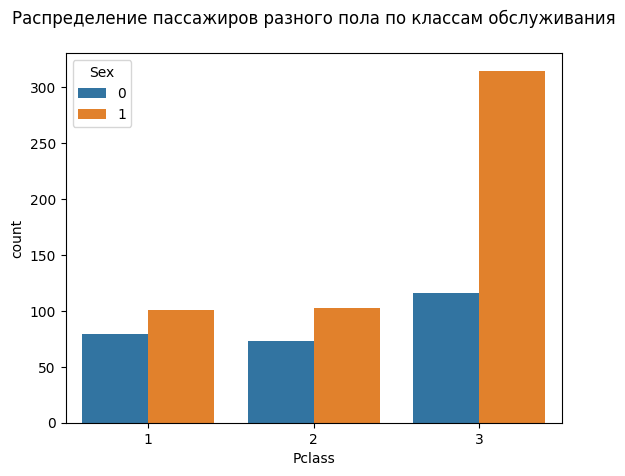

In [ ]:
sns.countplot(data=df_train, x='Pclass', hue='Sex')
plt.title('Распределение пассажиров разного пола по классам обслуживания\n')
plt.show()

Сразу видно, что пассажиров мужского пола и 3го класса обслуживания больше всего. 1 и 2 класс примерно равны.

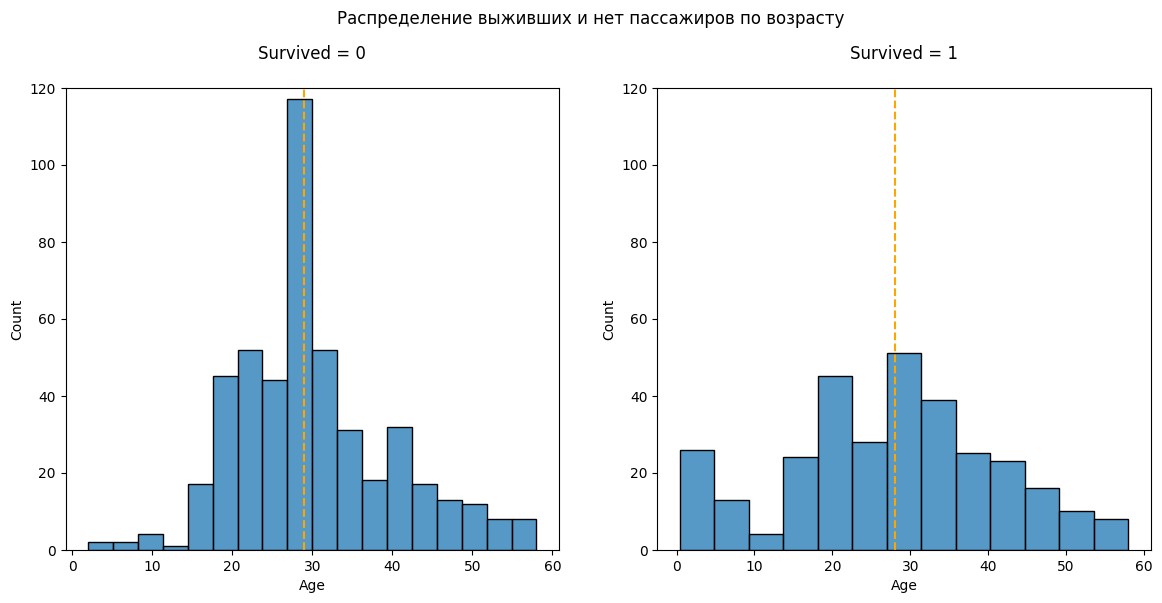

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Распределение выживших и нет пассажиров по возрасту', va='bottom')

sns.histplot(data=df_train[df_train['Survived'] == 0], x='Age', ax=ax[0]).set_title('Survived = 0\n')
sns.histplot(data=df_train[df_train['Survived'] == 1], x='Age', ax=ax[1]).set_title('Survived = 1\n')

for i in range(2):
  ax[i].axvline(x=df_train[df_train['Survived'] == i].Age.median(), color='orange', ls='--')

plt.setp(ax, ylim=(0, 120))
plt.show()

Количество выживших значительно меньше.
При этом пассажиры до 10 лет в основном в числе выживших (что логично, т.к. детей спасают в первую очередь).

Медианное значение примерно одинаковое. На борту были в основном 30летние пассажиры.

# 9. Преобразование признака Age

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train['Age_fix'] = scaler.fit_transform(df_train[['Age']])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Age_fix
0,0,3,1,22.0,1,0,7.2500,0,0,1,-0.629039
1,1,1,0,38.0,1,0,71.2833,1,0,0,0.762619
2,1,3,0,26.0,0,0,7.9250,0,0,1,-0.281124
3,1,1,0,35.0,1,0,53.1000,0,0,1,0.501683
4,0,3,1,35.0,0,0,8.0500,0,0,1,0.501683


# 10. Обучение модели (с преобразованными данными)

In [ ]:
X = df_train
X = X.drop(['Age', 'Survived'], axis=1)

X.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Age_fix
0,3,1,1,0,7.2500,0,0,1,-0.629039
1,1,0,1,0,71.2833,1,0,0,0.762619
2,3,0,0,0,7.9250,0,0,1,-0.281124
3,1,0,1,0,53.1000,0,0,1,0.501683
4,3,1,0,0,8.0500,0,0,1,0.501683


In [ ]:
y = df_train['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8203497615262321, 0.7721518987341772)

Значение accuracy увеличилось:
- для тренировочных данных = 0.82
- для тестовых данных = 0.77

# 11. Выводы

Удаление пропусков привело бы к потере 20% данных.

Пропуски в Fare и Age были заполнены средними значениями в зависимости от класса обслуживания, наличия родственников на борту и сокращенного образения в имени пассажира. Пропуски в Embarked заполнены в соответсвии с аналогичными записями в датасете.

Категориальные признаки были предобразованы с помощью LabelEncoder (Sex) и get_dummies (Embarked).

Признак Age преобразован с помощью StandardScaler.

Выбросы были частично удалены, но, если их совсем не удалять, то показатель метрики для тестовых данных становится лучше (код ниже).


In [ ]:
X = df_train
X = X.drop(['Age', 'Survived'], axis=1)

y = df_train['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.7991573033707865, 0.8156424581005587)

Метрика accuracy для обученной модели, и которой просто были удалены пропуски и категориальные переменные, равна 0.7.

Для модели с заполненными пропусками и преобразованными категориальными переменными accuracy равна 0.81 (для тестовых данных).

При работе с большими данными необходимо в целом оценить процентр пропусков для всех атрибутов. Плюс заполнение пропусков какими-то значениями (среднее, медиана и т.д.) может сильно исказить результат работы модели.